In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [70]:
df = pd.read_csv('./iris.data',sep=',',header=None)

In [71]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [72]:
dict = {0:'sepal_length',1:'sepal_width',2:'petal_length',3:'petal_width',4:'class'}

In [73]:
df.rename(columns=dict,
          inplace=True)

In [74]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
df.shape

(150, 5)

In [76]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [77]:
df = df.sample(frac = 1)

In [78]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
86,6.7,3.1,4.7,1.5,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [80]:
df['class'] = label_encoder.fit_transform(df['class'])

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
86,6.7,3.1,4.7,1.5,1
114,5.8,2.8,5.1,2.4,2
98,5.1,2.5,3.0,1.1,1
1,4.9,3.0,1.4,0.2,0
71,6.1,2.8,4.0,1.3,1


In [82]:
np_iris = df.to_numpy()

X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

In [83]:
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("Train Test Dimensions:")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


In [85]:

from tensorflow import keras
NB_CLASSES=3
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(4,),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 6s 36ms/step - loss: 0.8718 - accuracy: 0.6759 - val_loss: 0.6761 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5597 - accuracy: 0.8426 - val_loss: 0.5430 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4332 - accuracy: 0.8426 - val_loss: 0.4808 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3674 - accuracy: 0.8519 - val_loss: 0.4489 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 0.8796 - val_loss: 0.4216 - val_accuracy: 0.7778
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2954 - accuracy: 0.8889 - val_loss: 0.4028 - val_accuracy: 0.7778
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2774 - accuracy: 0.8889 - val_loss: 0.3814 - val_accuracy: 0.8148
Epoch 8/10
7/7 [==============

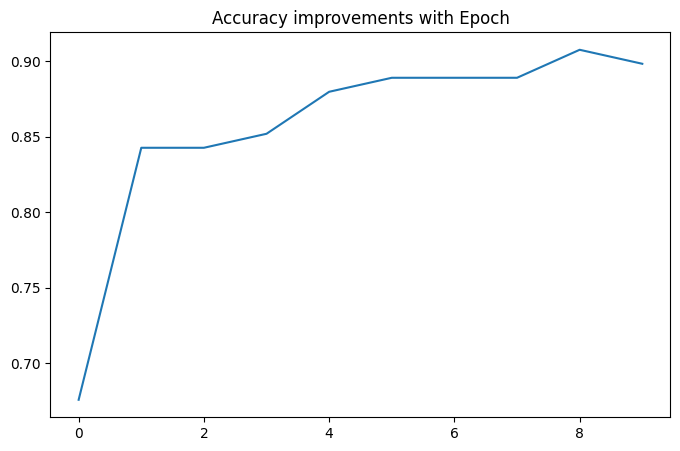

1/1 [==============================] - 0s 25ms/step - loss: 0.3453 - accuracy: 0.8000


[0.3452945053577423, 0.800000011920929]

In [86]:

VERBOSE=1
BATCH_SIZE=16
EPOCHS=10
VALIDATION_SPLIT=0.2

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


import matplotlib.pyplot as plt


pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


model.evaluate(X_test,Y_test)

In [87]:

model.save("iris_save")
loaded_model = keras.models.load_model("iris_save")
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
